In [36]:
import pandas as pd
import numpy as np
import requests
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from datetime import datetime

startTime = datetime.now()

## Extracting Data

In [37]:
url = "https://cct-ds-code-challenge-input-data.s3.af-south-1.amazonaws.com/sr_hex.csv.gz"
sr_zip = requests.get(url, allow_redirects=True)
!tar -xvzf sr_hex.csv.gz 

tar: Error opening archive: Failed to open 'sr_hex.csv.gz'


In [40]:
df = pd.read_csv ('Data/service_request_compare/sr_hex.csv')

In [41]:
#df = pd.read_csv ('sr_hex.csv')

## Data Transformation

In [42]:
#Reading Data


#df = read_csv('Data/service_request_compare/sr_hex.csv')

In [45]:
df2 = df.loc[((df['department'] == 'Water and Sanitation'))]
df2 = df2[['CreationTimestamp','h3_level8_index']]
df2['CreationTimestamp'] = df2.loc[:, ('CreationTimestamp')].astype(str).str[:10]
df2['h3_level8_index'] = df2['h3_level8_index'].astype(str)
df2.insert(loc=2, column='Total_Requests',value=1)
df2['CreationTimestamp'] = pd.to_datetime(df2['CreationTimestamp'])
df2 = df2.groupby(['h3_level8_index', pd.Grouper(key='CreationTimestamp', freq='W-TUE')])['Total_Requests'].sum().reset_index().sort_values('CreationTimestamp')
df3 = df2.loc[~((df2['h3_level8_index'] == '0'))]
df3 = df3.groupby(by=['CreationTimestamp']).sum('Total_Requests').reset_index().type(str)

AttributeError: 'DataFrame' object has no attribute 'type'

## Prepping Data for FB Prophet

In [7]:
df3.columns = ['ds', 'y']

## Defining Model

In [9]:
model = Prophet()
#weekly_seasonality=True
train, test = train_test_split(df3, test_size = 0.05, shuffle=False)
model_fit = model.fit (train)

## Making Future Predicitons

In [11]:
future = model_fit.make_future_dataframe(periods=13, freq='W')
predictions = model_fit.predict(future)
model_fit.plot(predictions)

        h3_level8_index CreationTimestamp  Total_Requests
0                     0        2017-01-03             138
106484  88ad361ae1fffff        2017-01-03               2
106626  88ad361ae3fffff        2017-01-03               2
106782  88ad361ae5fffff        2017-01-03               1
106929  88ad361ae7fffff        2017-01-03               3
...                 ...               ...             ...
58964   88ad3612e3fffff        2019-12-31               7
143672  88ad368dadfffff        2019-12-31               4
152564  88ad36b921fffff        2019-12-31               1
107389  88ad361aebfffff        2019-12-31              14
87524   88ad3618e3fffff        2019-12-31               2

[185760 rows x 3 columns]


## Future Predictions drill down


In [13]:
model_fit.plot_components(predictions)

## Predictions data


In [15]:
predictions['yhat'] = np.round(predictions['yhat'])
final = predictions.rename({'ds': 'date','yhat' : 'Service Requests Expected'}, axis=1)
print("Final Answer:" )
final[['date','Service Requests Expected']].tail()

## End Timmer

In [17]:
print("Script time")
print(datetime.now() - startTime)

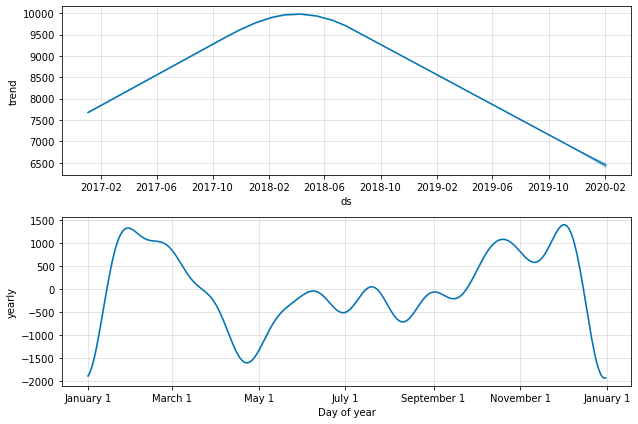

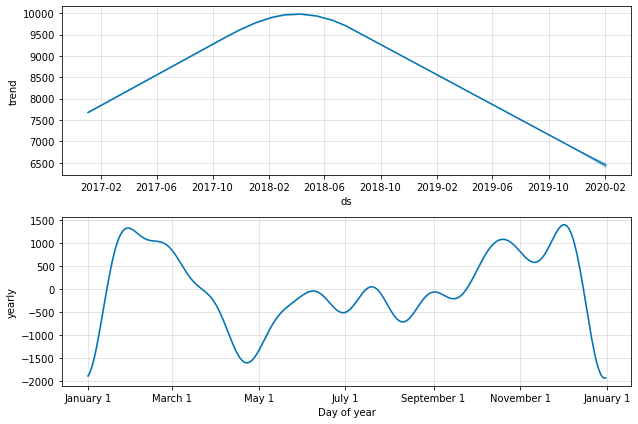

In [21]:
print("Final Answer:" )
final[['date','Service Requests Expected']].tail()


Final Answer:


,date,Service Requests Expected
157,2020-01-05,4972.0
158,2020-01-12,6024.0
159,2020-01-19,7150.0
160,2020-01-26,7734.0
161,2020-02-02,7735.0


Script time
0:00:51.387942
